In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import pylab as plt

In [4]:
import matplotlib.pyplot as mplt

In [5]:
df = pd.read_csv("/home/sofiagm/CompuDatos/Eval1/GLB.Ts+dSST.csv",skiprows=2,names=['Año','Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sept','Oct','Nov','Dic','EneDic','DicNov','DJF','MAM','JJA','SON'])

In [6]:
df.head()

,Año,Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sept,Oct,Nov,Dic,EneDic,DicNov,DJF,MAM,JJA,SON
0,1880,-0.29,-.21,-.18,-.27,-.14,-.29,-.23,-.08,-.16,-.15,-.18,-.22,-.20,***,***,-.20,-.20,-.17
1,1881,-0.10,-.14,.01,-.03,-.04,-.28,-.06,-.02,-.09,-.20,-.26,-.16,-.11,-.12,-.15,-.02,-.12,-.18
2,1882,0.09,.08,.01,-.20,-.17,-.25,-.11,.03,.00,-.23,-.21,-.25,-.10,-.09,.00,-.12,-.11,-.15
3,1883,-0.34,-.42,-.18,-.24,-.26,-.13,-.09,-.14,-.19,-.12,-.21,-.19,-.21,-.21,-.34,-.23,-.12,-.17
4,1884,-0.18,-.12,-.35,-.36,-.32,-.38,-.34,-.26,-.23,-.22,-.30,-.29,-.28,-.27,-.16,-.34,-.33,-.25


In [7]:
df.columns

Index(['Año', 'Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sept',
       'Oct', 'Nov', 'Dic', 'EneDic', 'DicNov', 'DJF', 'MAM', 'JJA', 'SON'],
      dtype='object')

In [8]:
df.Año= pd.to_numeric(df.Año, errors='coerce')
df.EneDic= pd.to_numeric(df.EneDic, errors='coerce')
df.Ene= pd.to_numeric(df.Ene, errors='coerce')
df.Feb= pd.to_numeric(df.Feb, errors='coerce')
df.Mar= pd.to_numeric(df.Mar, errors='coerce')
df.Abr= pd.to_numeric(df.Abr, errors='coerce')
df.May= pd.to_numeric(df.May, errors='coerce')
df.Jun= pd.to_numeric(df.Jun, errors='coerce')
df.Jul= pd.to_numeric(df.Jul, errors='coerce')
df.Ago= pd.to_numeric(df.Ago, errors='coerce')
df.Sept= pd.to_numeric(df.Sept, errors='coerce')
df.Oct= pd.to_numeric(df.Oct, errors='coerce')
df.Nov= pd.to_numeric(df.Nov, errors='coerce')
df.Dic= pd.to_numeric(df.Dic, errors='coerce')

In [17]:
x=df[u'Año']
y=df[u'EneDic']

In [18]:
mplt.plot(x,y,'k',marker='.')
mplt.grid(True)
plt.title('Temperaturas Promedio Anual')
plt.xlabel('Año')
plt.ylabel('Temperatura (°C)')

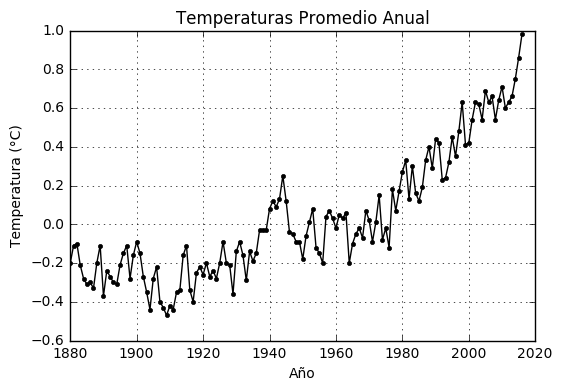

In [11]:
plt.show()

In [12]:
import statsmodels.api as sm
from scipy.interpolate import interp1d

In [19]:
lowess = sm.nonparametric.lowess(y, x, frac=.3)
x = df.Año
y = df.EneDic

lowess_x = list(zip(*lowess))[0]
lowess_y = list(zip(*lowess))[1]


f = interp1d(lowess_x, lowess_y, bounds_error=False)

xnew = [i/10. for i in range(140)]


ynew = f(xnew)


plt.plot(x, y, '.',color='k')
plt.plot(lowess_x, lowess_y, color='r')
plt.plot(xnew, ynew)

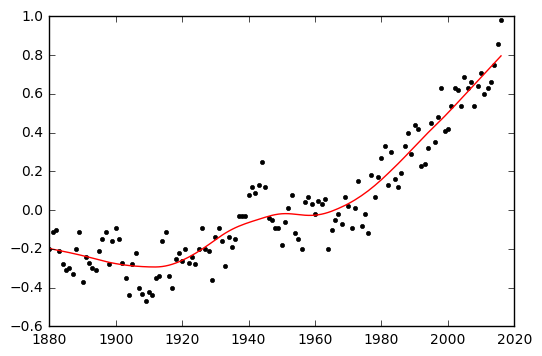

In [14]:
plt.show()

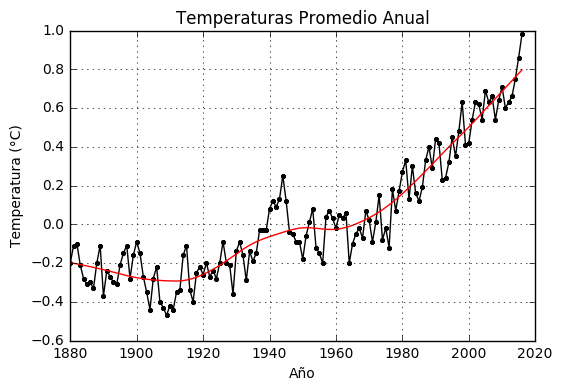

In [20]:
plt.show()

/opt/anaconda/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


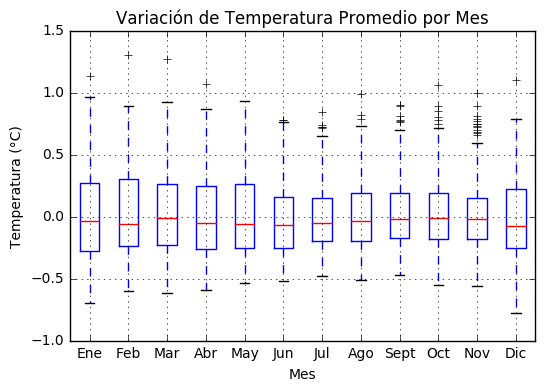

In [23]:
df.boxplot(column=[u'Ene',u'Feb', u'Mar', u'Abr', u'May', u'Jun', u'Jul', u'Ago', u'Sept',
       u'Oct', u'Nov', u'Dic'])
plt.title('Variación de Temperatura Promedio por Mes')
plt.ylabel('Temperatura (°C)')
plt.xlabel('Mes')
plt.show()